<a href="https://colab.research.google.com/github/AlvaroBecker/CodingDojoTareas-/blob/main/Ejercicio_de_%C3%A1rbol_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Ejecutar un modelo de árbol de regresión con los parámetros por defecto (profundidad ilimitada)

2) Determinar la profundidad del árbol por defecto.

3) Intentar diferentes valores para max_depth y determinar el valor óptimo basándose en el mejor (el más alto) valor R2. ¿Cuál es el max_depth óptimo según las pruebas de ustedes?

¿Cuál es el R2 del modelo final en el conjunto de entrenamiento y de prueba?

In [193]:
def format_drive_url(url):
    file_id = url.split('/')[-2]
    download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
    return download_url

url='https://drive.google.com/file/d/1EtNMLkPCltdm8TH_HA-c8D4L75apgzkn/view'

In [194]:
import pandas as pd 

In [195]:
df=pd.read_csv(format_drive_url(url))

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [197]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [199]:
df.duplicated().sum()

0

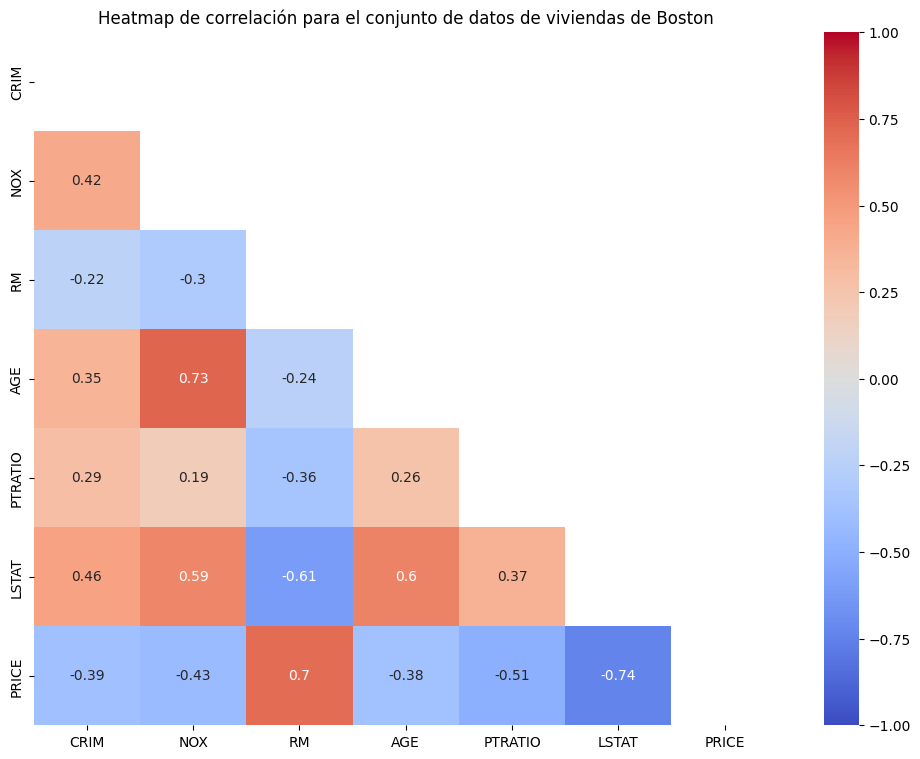

In [200]:
# Calcular la matriz de correlación
corr_matrix = df.corr()
# Crear una máscara triangular superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear un heatmap con Seaborn
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

# Configurar el título y mostrar el gráfico
plt.title("Heatmap de correlación para el conjunto de datos de viviendas de Boston")
plt.show()

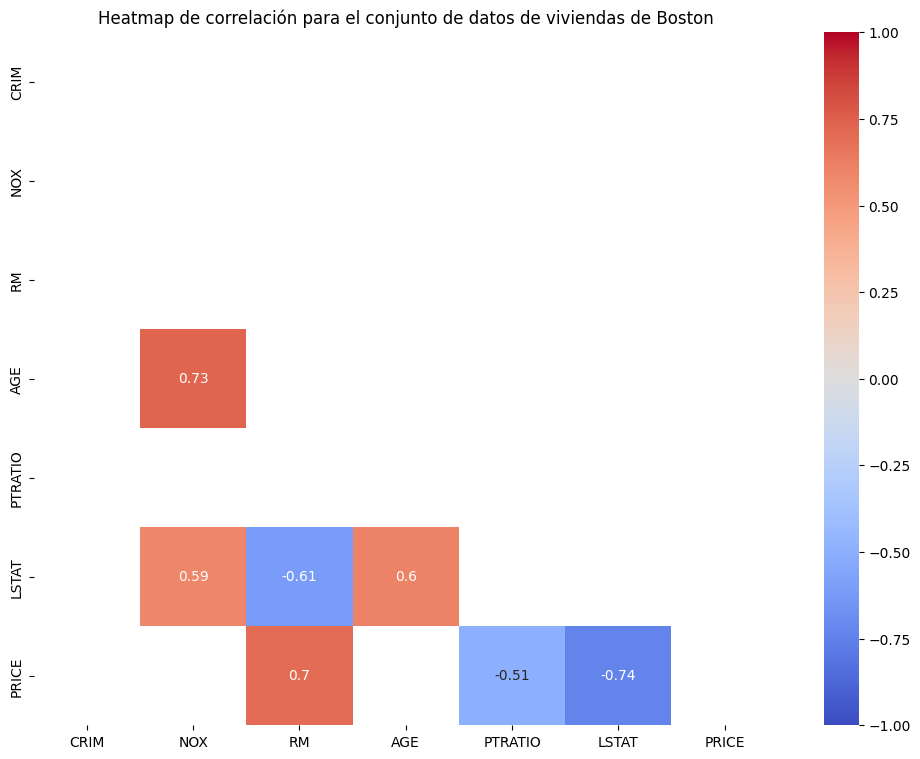

In [201]:
# Crear una máscara para ocultar los valores en el rango (-0.5, 0.5) y la diagonal
mask = np.abs(corr_matrix) <= 0.5

# Crear una máscara triangular superior y combinarla con la máscara anterior
triu_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask = mask | triu_mask

# Convertir el DataFrame de la máscara en un array de NumPy y ocultar la diagonal
mask_np = mask.to_numpy()
np.fill_diagonal(mask_np, True)

# Crear un heatmap con Seaborn
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask_np)

# Configurar el título y mostrar el gráfico
plt.title("Heatmap de correlación para el conjunto de datos de viviendas de Boston")
plt.show()

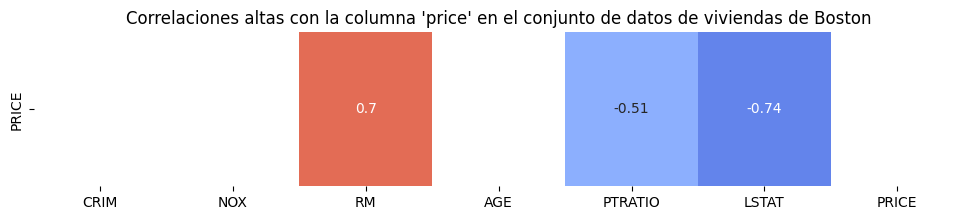

In [202]:
# Crear una máscara para ocultar los valores en el rango (-0.5, 0.5)
mask = np.abs(corr_matrix['PRICE']) <= 0.5

# Crear un DataFrame con solo la columna 'price'
price_corr = pd.DataFrame(corr_matrix['PRICE']).T

# Aplicar la máscara al DataFrame 'price_corr'
price_corr_masked = price_corr.where((np.abs(price_corr) >= 0.5) & (np.abs(price_corr) < 1.0))

# Crear un heatmap con Seaborn
plt.figure(figsize=(12, 2))
sns.heatmap(price_corr_masked, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Configurar el título y mostrar el gráfico
plt.title("Correlaciones altas con la columna 'price' en el conjunto de datos de viviendas de Boston")
plt.show()

In [203]:
columnas_mayor_correlacion = corr_matrix[(np.abs(corr_matrix['PRICE']) >= 0.5) & (np.abs(corr_matrix['PRICE']) < 1.0)].index

X = df[columnas_mayor_correlacion]
y = df['PRICE']

In [204]:
columnas_mayor_correlacion

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

In [205]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

In [206]:
num_transformer = make_pipeline(
    StandardScaler())


preprocessor = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=np.number)),
)

pipeline = make_pipeline(preprocessor)
pipeline.fit(X_train)

#ejecutar pipeline
X_train_processed = pipeline.transform(X_train)
X_test_processed= pipeline.transform(X_test)
#recoger los nombres de las columnas
columns_df=[col.split("__")[-1] for col in pipeline.get_feature_names_out(input_features=None)]
#transformar el resultado del pipeline a un dataframe esto se puede no hacer al igual que sacar los nombres ya que ahorra espacio de procesamineto
X_train_processed=pd.DataFrame(X_train_processed, columns=columns_df)
X_test_processed=pd.DataFrame(X_test_processed, columns=columns_df)
X_train_processed

,RM,PTRATIO,LSTAT
0,1.156255,-0.205157,-1.077756
1,-0.238475,-1.576252,0.351165
2,2.080976,-1.487795,-1.226252
3,-0.987986,0.369819,2.065870
4,0.013216,-0.603217,-0.724729
...,...,...,...
374,-0.677892,1.165939,0.861093
375,-0.650081,0.148674,0.068182
376,0.433164,-0.558988,-0.913851
377,0.424821,0.856337,1.506909


In [207]:
from sklearn.tree import DecisionTreeRegressor

In [208]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [209]:
#Determinar la profundidad del árbol por defecto.
dec_tree.get_depth()

20

In [210]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2,random_state=42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.7089458256236383
0.6370379660938669


In [211]:
dec_tree_15 = DecisionTreeRegressor(max_depth = 15,random_state=42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.9995516992894694
0.4455752507781666


¿Cuál es el max_depth óptimo según las pruebas de ustedes?

a pesar que depth 15 tiene un score mayor en train su test score es demasiado bajo, por lo que no lo hace un buen valor para la profundidad del modelo, en cambio, con 2 de profundidad los score entre train y test estan mas cercanos lo que lo hace una mejor opcion

In [212]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
op=0
score_h=0
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,random_state=42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)
    if score > score_h:
      score_h=score
      op=depth

In [213]:
score_h

0.7200322619567403

In [214]:
op

6

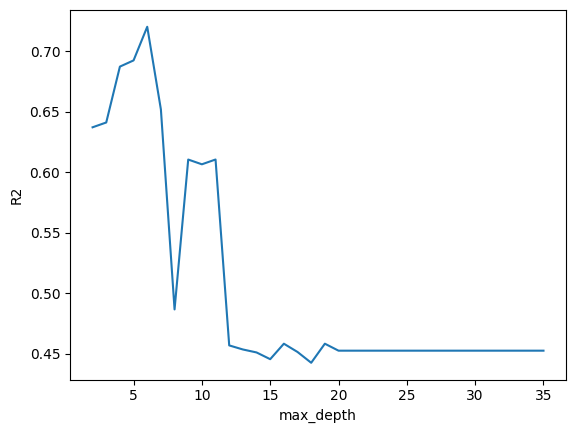

In [215]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [216]:
# Ejecutemos el modelo con nuestro valor optimizado para max_depth
dec_tree_op = DecisionTreeRegressor(max_depth = op,random_state=42 )
dec_tree_op.fit(X_train, y_train)
train_op_score = dec_tree_op.score(X_train, y_train)
test_op_score = dec_tree_op.score(X_test, y_test)
print(f'{op} depth score train: {train_op_score}')
print(f'{op} depth score test: {test_op_score}')

6 depth score train: 0.9214827076541541
6 depth score test: 0.7200322619567403


6 depth score train: 0.9214827076541541
6 depth score test: 0.7200322619567403

Valores mas optimos para nuestro modelo